In [1]:
import glob
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from scipy import stats

In [2]:
# read count csv
df_merged = pd.read_csv('../data/validation_screen_count_allguides.csv')

In [3]:
#sum of all bins
df_merged['r1_cd58_bin_sum'] = df_merged['r1_cd58_1_count']+df_merged['r1_cd58_2_count']+df_merged['r1_cd58_3_count']+df_merged['r1_cd58_4_count']
df_merged['r1_cd81_bin_sum'] = df_merged['r1_cd81_1_count']+df_merged['r1_cd81_2_count']+df_merged['r1_cd81_3_count']+df_merged['r1_cd81_4_count']
df_merged['r2_d9_cd58_bin_sum']= df_merged['r2_d9_cd58_1_count']+df_merged['r2_d9_cd58_2_count']+df_merged['r2_d9_cd58_3_count']+df_merged['r2_d9_cd58_4_count']
df_merged['r2_d9_cd81_bin_sum']= df_merged['r2_d9_cd81_1_count']+df_merged['r2_d9_cd81_2_count']+df_merged['r2_d9_cd81_3_count']+df_merged['r2_d9_cd81_4_count']
df_merged['r2_d10_cd58_bin_sum']= df_merged['r2_d10_cd58_1_count']+df_merged['r2_d10_cd58_2_count']+df_merged['r2_d10_cd58_3_count']+df_merged['r2_d10_cd58_4_count']
df_merged['r2_d10_cd81_bin_sum']= df_merged['r2_d10_cd81_1_count']+df_merged['r2_d10_cd81_2_count']+df_merged['r2_d10_cd81_3_count']+df_merged['r2_d10_cd81_4_count']
df_merged['r3_cd58_bin_sum'] = df_merged['r3_cd58_1_count']+df_merged['r3_cd58_2_count']+df_merged['r3_cd58_3_count']+df_merged['r3_cd58_4_count']
df_merged['r3_cd81_bin_sum'] = df_merged['r3_cd81_1_count']+df_merged['r3_cd81_2_count']+df_merged['r3_cd81_3_count']+df_merged['r3_cd81_4_count']
df_merged['r4_cd58_bin_sum'] = df_merged['r4_cd58_1_count']+df_merged['r4_cd58_2_count']+df_merged['r4_cd58_3_count']+df_merged['r4_cd58_4_count']
df_merged['r4_cd81_bin_sum'] = df_merged['r4_cd81_1_count']+df_merged['r4_cd81_2_count']+df_merged['r4_cd81_3_count']+df_merged['r4_cd81_4_count']

In [4]:
#remove guides with low counts
df_merged_filter = df_merged[(df_merged['r1_cd58_bin_sum']>200) & (df_merged['r1_cd81_bin_sum']>200) & 
                                (df_merged['r2_d9_cd58_bin_sum']>200) & (df_merged['r2_d9_cd81_bin_sum']>200) &
                             (df_merged['r2_d10_cd58_bin_sum']>200) & (df_merged['r2_d10_cd81_bin_sum']>200) &
                            (df_merged['r3_cd58_bin_sum']>200) & (df_merged['r3_cd81_bin_sum']>200) & 
                            (df_merged['r4_cd58_bin_sum']>200) & (df_merged['r4_cd81_bin_sum']>200) ]

In [5]:
#normalize counts, filtered data
total_count_col = df_merged_filter.sum().values[1:-10]
print(total_count_col)
df_merged_norm_data = df_merged_filter.iloc[:,1:-10]/total_count_col

[9171137 1213633 1746000 8454021 10145935 1349749 3863982 8772303 9797346
 3920223 3250600 7799726 8436253 910775 2850108 2577496 3724009 5368174
 1763110 3564224 1120232 10086065 4571479 1136134 3614500 1593491 2232986
 8169401 8384638 3117603 6350301 7814018 5571208 8267372 4253044 6464118
 7174737 2904125 8306737 7718256 12921299 7379258 6625369 4661545 8019813]


In [6]:
#deal with zero division, add a very small number to all data
df_merged_norm_data += 1e-09
df_merged_norm = pd.concat([df_merged_filter['guide'], df_merged_norm_data], axis=1)

In [7]:
# relative counts and ratio
df_merged_norm.iloc[:,1:] = df_merged_norm.iloc[:,1:].astype('float')
for index, row in df_merged_norm.iterrows():
    # bin1 to bin4 ratio
    df_merged_norm.loc[index,'r1_cd81_1_to_4'] = float(row['r1_cd81_1_count'])/float(row['r1_cd81_4_count'])
    df_merged_norm.loc[index,'r1_cd58_1_to_4']= float(row['r1_cd58_1_count'])/float(row['r1_cd58_4_count'])
    df_merged_norm.loc[index,'r2_d9_cd81_1_to_4']= float(row['r2_d9_cd81_1_count'])/float(row['r2_d9_cd81_4_count'])
    df_merged_norm.loc[index,'r2_d9_cd58_1_to_4']= float(row['r2_d9_cd58_1_count'])/float(row['r2_d9_cd58_4_count'])
    df_merged_norm.loc[index,'r2_d10_cd81_1_to_4']= float(row['r2_d10_cd81_1_count'])/float(row['r2_d10_cd81_4_count'])
    df_merged_norm.loc[index,'r2_d10_cd58_1_to_4']= float(row['r2_d10_cd58_1_count'])/float(row['r2_d10_cd58_4_count'])
    df_merged_norm.loc[index,'r3_cd81_1_to_4'] = float(row['r3_cd81_1_count'])/float(row['r3_cd81_4_count'])
    df_merged_norm.loc[index,'r3_cd58_1_to_4']= float(row['r3_cd58_1_count'])/float(row['r3_cd58_4_count'])
    df_merged_norm.loc[index,'r4_cd81_1_to_4'] = float(row['r4_cd81_1_count'])/float(row['r4_cd81_4_count'])
    df_merged_norm.loc[index,'r4_cd58_1_to_4']= float(row['r4_cd58_1_count'])/float(row['r4_cd58_4_count'])
    # bin1 to bin1,4 ratio
    df_merged_norm.loc[index,'r1_cd81_1_to_sum_1_4'] = float(row['r1_cd81_1_count'])/(float(row['r1_cd81_4_count'])+float(row['r1_cd81_1_count']))
    df_merged_norm.loc[index,'r1_cd58_1_to_sum_1_4'] = float(row['r1_cd58_1_count'])/(float(row['r1_cd58_4_count'])+float(row['r1_cd58_1_count']))
    df_merged_norm.loc[index,'r2_d9_cd81_1_to_sum_1_4'] = float(row['r2_d9_cd81_1_count'])/(float(row['r2_d9_cd81_4_count'])+float(row['r2_d9_cd81_1_count']))
    df_merged_norm.loc[index,'r2_d9_cd58_1_to_sum_1_4'] = float(row['r2_d9_cd58_1_count'])/(float(row['r2_d9_cd58_4_count'])+float(row['r2_d9_cd58_1_count']))
    df_merged_norm.loc[index,'r2_d10_cd81_1_to_sum_1_4'] = float(row['r2_d10_cd81_1_count'])/(float(row['r2_d10_cd81_4_count'])+float(row['r2_d10_cd81_1_count']))
    df_merged_norm.loc[index,'r2_d10_cd58_1_to_sum_1_4'] = float(row['r2_d10_cd58_1_count'])/(float(row['r2_d10_cd58_4_count'])+float(row['r2_d10_cd58_1_count']))
    df_merged_norm.loc[index,'r3_cd81_1_to_sum_1_4'] = float(row['r3_cd81_1_count'])/(float(row['r3_cd81_4_count'])+float(row['r3_cd81_1_count']))
    df_merged_norm.loc[index,'r3_cd58_1_to_sum_1_4'] = float(row['r3_cd58_1_count'])/(float(row['r3_cd58_4_count'])+float(row['r3_cd58_1_count']))
    df_merged_norm.loc[index,'r4_cd81_1_to_sum_1_4'] = float(row['r4_cd81_1_count'])/(float(row['r4_cd81_4_count'])+float(row['r4_cd81_1_count']))
    df_merged_norm.loc[index,'r4_cd58_1_to_sum_1_4'] = float(row['r4_cd58_1_count'])/(float(row['r4_cd58_4_count'])+float(row['r4_cd58_1_count']))    
     # bin1 to sum of four bins    
    df_merged_norm.loc[index,'r1_cd81_1_count_relative_bin']= float(row['r1_cd81_1_count'])/(float(row['r1_cd81_1_count'])+float(row['r1_cd81_2_count'])+float(row['r1_cd81_3_count'])+float(row['r1_cd81_4_count']))
    df_merged_norm.loc[index,'r1_cd58_1_count_relative_bin']= float(row['r1_cd58_1_count'])/(float(row['r1_cd58_1_count'])+float(row['r1_cd58_2_count'])+float(row['r1_cd58_3_count'])+float(row['r1_cd58_4_count']))
    df_merged_norm.loc[index,'r2_d9_cd81_1_count_relative_bin']= float(row['r2_d9_cd81_1_count'])/(float(row['r2_d9_cd81_1_count'])+float(row['r2_d9_cd81_2_count'])+float(row['r2_d9_cd81_3_count'])+float(row['r2_d9_cd81_4_count']))
    df_merged_norm.loc[index,'r2_d9_cd58_1_count_relative_bin']= float(row['r2_d9_cd58_1_count'])/(float(row['r2_d9_cd58_1_count'])+float(row['r2_d9_cd58_2_count'])+float(row['r2_d9_cd58_3_count'])+float(row['r2_d9_cd58_4_count']))        
    df_merged_norm.loc[index,'r2_d10_cd81_1_count_relative_bin']= float(row['r2_d10_cd81_1_count'])/(float(row['r2_d10_cd81_1_count'])+float(row['r2_d10_cd81_2_count'])+float(row['r2_d10_cd81_3_count'])+float(row['r2_d10_cd81_4_count']))
    df_merged_norm.loc[index,'r2_d10_cd58_1_count_relative_bin']= float(row['r2_d10_cd58_1_count'])/(float(row['r2_d10_cd58_1_count'])+float(row['r2_d10_cd58_2_count'])+float(row['r2_d10_cd58_3_count'])+float(row['r2_d10_cd58_4_count'])) 
    df_merged_norm.loc[index,'r3_cd81_1_count_relative_bin']= float(row['r3_cd81_1_count'])/(float(row['r3_cd81_1_count'])+float(row['r3_cd81_2_count'])+float(row['r3_cd81_3_count'])+float(row['r3_cd81_4_count']))
    df_merged_norm.loc[index,'r3_cd58_1_count_relative_bin']= float(row['r3_cd58_1_count'])/(float(row['r3_cd58_1_count'])+float(row['r3_cd58_2_count'])+float(row['r3_cd58_3_count'])+float(row['r3_cd58_4_count']))
    df_merged_norm.loc[index,'r4_cd81_1_count_relative_bin']= float(row['r4_cd81_1_count'])/(float(row['r4_cd81_1_count'])+float(row['r4_cd81_2_count'])+float(row['r4_cd81_3_count'])+float(row['r4_cd81_4_count']))
    df_merged_norm.loc[index,'r4_cd58_1_count_relative_bin']= float(row['r4_cd58_1_count'])/(float(row['r4_cd58_1_count'])+float(row['r4_cd58_2_count'])+float(row['r4_cd58_3_count'])+float(row['r4_cd58_4_count']))
    # bin1 to unsorted bin ratio
    df_merged_norm.loc[index,'r1_cd81_1_count_ratio_input']= float(row['r1_cd81_1_count'])/float(row['r1_unsort_count'])
    df_merged_norm.loc[index,'r1_cd58_1_count_ratio_input']= float(row['r1_cd58_1_count'])/float(row['r1_unsort_count'])
    df_merged_norm.loc[index,'r2_d9_cd81_1_count_ratio_input']= float(row['r2_d9_cd81_1_count'])/float(row['r2_d9_unsort_count'])
    df_merged_norm.loc[index,'r2_d9_cd58_1_count_ratio_input']= float(row['r2_d9_cd58_1_count'])/float(row['r2_d9_unsort_count'])
    df_merged_norm.loc[index,'r2_d10_cd81_1_count_ratio_input']= float(row['r2_d10_cd81_1_count'])/float(row['r2_d10_unsort_count'])
    df_merged_norm.loc[index,'r2_d10_cd58_1_count_ratio_input']= float(row['r2_d10_cd58_1_count'])/float(row['r2_d10_unsort_count'])
    df_merged_norm.loc[index,'r3_cd81_1_count_ratio_input']= float(row['r3_cd81_1_count'])/float(row['r3_unsort_count'])
    df_merged_norm.loc[index,'r3_cd58_1_count_ratio_input']= float(row['r3_cd58_1_count'])/float(row['r3_unsort_count'])
    df_merged_norm.loc[index,'r4_cd81_1_count_ratio_input']= float(row['r4_cd81_1_count'])/float(row['r4_unsort_count'])
    df_merged_norm.loc[index,'r4_cd58_1_count_ratio_input']= float(row['r4_cd58_1_count'])/float(row['r4_unsort_count'])
    #bin1 to bin3 ratio
    df_merged_norm.loc[index,'r1_cd81_1_to_3'] = float(row['r1_cd81_1_count'])/float(row['r1_cd81_3_count'])
    df_merged_norm.loc[index,'r1_cd58_1_to_3']= float(row['r1_cd58_1_count'])/float(row['r1_cd58_3_count'])
    df_merged_norm.loc[index,'r2_d9_cd81_1_to_3']= float(row['r2_d9_cd81_1_count'])/float(row['r2_d9_cd81_3_count'])
    df_merged_norm.loc[index,'r2_d9_cd58_1_to_3']= float(row['r2_d9_cd58_1_count'])/float(row['r2_d9_cd58_3_count'])
    df_merged_norm.loc[index,'r2_d10_cd81_1_to_3']= float(row['r2_d10_cd81_1_count'])/float(row['r2_d10_cd81_3_count'])
    df_merged_norm.loc[index,'r2_d10_cd58_1_to_3']= float(row['r2_d10_cd58_1_count'])/float(row['r2_d10_cd58_3_count'])
    df_merged_norm.loc[index,'r3_cd81_1_to_3'] = float(row['r3_cd81_1_count'])/float(row['r3_cd81_3_count'])
    df_merged_norm.loc[index,'r3_cd58_1_to_3']= float(row['r3_cd58_1_count'])/float(row['r3_cd58_3_count'])
    df_merged_norm.loc[index,'r4_cd81_1_to_3'] = float(row['r4_cd81_1_count'])/float(row['r4_cd81_3_count'])
    df_merged_norm.loc[index,'r4_cd58_1_to_3']= float(row['r4_cd58_1_count'])/float(row['r4_cd58_3_count'])

In [8]:
df_merged_norm.to_csv('../data/validation_screen_normed_count_ratios_allguides.csv', index=False)

In [3]:
#start here
df_merged_norm = pd.read_csv('../data/validation_screen_normed_count_ratios_allguides.csv')

In [4]:
#log2 transform all ratios except bin1_to_sumbins, bin1_to_sum1,4
ratios = df_merged_norm.iloc[:,46:].astype('float')
bin1_to_sumbins = ratios[['r1_cd58_1_count_relative_bin','r1_cd81_1_count_relative_bin','r2_d9_cd58_1_count_relative_bin','r2_d9_cd81_1_count_relative_bin','r2_d10_cd58_1_count_relative_bin','r2_d10_cd81_1_count_relative_bin','r3_cd58_1_count_relative_bin','r3_cd81_1_count_relative_bin','r4_cd58_1_count_relative_bin','r4_cd81_1_count_relative_bin',
                         'r1_cd81_1_to_sum_1_4','r1_cd58_1_to_sum_1_4','r2_d9_cd81_1_to_sum_1_4','r2_d9_cd58_1_to_sum_1_4','r2_d10_cd81_1_to_sum_1_4','r2_d10_cd58_1_to_sum_1_4','r3_cd81_1_to_sum_1_4','r3_cd58_1_to_sum_1_4','r4_cd81_1_to_sum_1_4','r4_cd58_1_to_sum_1_4']]
other_ratios = ratios.drop(columns=['r1_cd58_1_count_relative_bin','r1_cd81_1_count_relative_bin','r2_d9_cd58_1_count_relative_bin','r2_d9_cd81_1_count_relative_bin','r2_d10_cd58_1_count_relative_bin','r2_d10_cd81_1_count_relative_bin','r3_cd58_1_count_relative_bin','r3_cd81_1_count_relative_bin','r4_cd58_1_count_relative_bin','r4_cd81_1_count_relative_bin',
                         'r1_cd81_1_to_sum_1_4','r1_cd58_1_to_sum_1_4','r2_d9_cd81_1_to_sum_1_4','r2_d9_cd58_1_to_sum_1_4','r2_d10_cd81_1_to_sum_1_4','r2_d10_cd58_1_to_sum_1_4','r3_cd81_1_to_sum_1_4','r3_cd58_1_to_sum_1_4','r4_cd81_1_to_sum_1_4','r4_cd58_1_to_sum_1_4'])
#log2
normalized_df = np.log2(other_ratios)

In [5]:
# merge data
df_rel_otherratio = pd.concat([df_merged_norm['guide'], normalized_df], axis=1)
df_rel_new = pd.concat([df_rel_otherratio,bin1_to_sumbins], axis=1)
guide_all = df_rel_new

In [6]:
#average replicates' ratio, no rep2d9, with rep3
guide_all['cd58_1_count_relative_bin_avg_withr3']=(guide_all['r1_cd58_1_count_relative_bin']+guide_all['r2_d10_cd58_1_count_relative_bin']+guide_all['r3_cd58_1_count_relative_bin']+guide_all['r4_cd58_1_count_relative_bin'])/4
guide_all['cd81_1_count_relative_bin_avg_withr3']=(guide_all['r1_cd81_1_count_relative_bin']+guide_all['r2_d10_cd81_1_count_relative_bin']+guide_all['r3_cd81_1_count_relative_bin']+guide_all['r4_cd81_1_count_relative_bin'])/4
guide_all['cd58_1_to_4_avg_withr3']= (guide_all['r1_cd58_1_to_4']+guide_all['r2_d10_cd58_1_to_4']+guide_all['r3_cd58_1_to_4']+guide_all['r4_cd58_1_to_4'])/4
guide_all['cd81_1_to_4_avg_withr3']= (guide_all['r1_cd81_1_to_4']+guide_all['r2_d10_cd81_1_to_4']+guide_all['r3_cd81_1_to_4']+guide_all['r4_cd81_1_to_4'])/4
guide_all['cd58_1_to_sum_1_4_avg_withr3']=(guide_all['r1_cd58_1_to_sum_1_4']+guide_all['r2_d10_cd58_1_to_sum_1_4']+guide_all['r3_cd58_1_to_sum_1_4']+guide_all['r4_cd58_1_to_sum_1_4'])/4
guide_all['cd81_1_to_sum_1_4_avg_withr3']=(guide_all['r1_cd81_1_to_sum_1_4']+guide_all['r2_d10_cd81_1_to_sum_1_4']+guide_all['r3_cd81_1_to_sum_1_4']+guide_all['r4_cd81_1_to_sum_1_4'])/4
guide_all['cd58_1_count_ratio_input_avg_withr3']= (guide_all['r1_cd58_1_count_ratio_input']+guide_all['r2_d10_cd58_1_count_ratio_input']+guide_all['r3_cd58_1_count_ratio_input']+guide_all['r4_cd58_1_count_ratio_input'])/4
guide_all['cd81_1_count_ratio_input_avg_withr3']= (guide_all['r1_cd81_1_count_ratio_input']+guide_all['r2_d10_cd81_1_count_ratio_input']+guide_all['r3_cd81_1_count_ratio_input']+guide_all['r4_cd81_1_count_ratio_input'])/4
guide_all['cd58_1_to_3_avg_withr3']= (guide_all['r1_cd58_1_to_3']+guide_all['r2_d10_cd58_1_to_3']+guide_all['r3_cd58_1_to_3']+guide_all['r4_cd58_1_to_3'])/4
guide_all['cd81_1_to_3_avg_withr3']= (guide_all['r1_cd81_1_to_3']+guide_all['r2_d10_cd81_1_to_3']+guide_all['r3_cd81_1_to_3']+guide_all['r4_cd81_1_to_3'])/4

In [7]:
#add guide info and separate by gene
guide_info = pd.read_csv('../data/cd_58_81_guides.csv')
guide_targeting = guide_all.merge(guide_info, left_on='guide', right_on='spacer') #exclude nt guide
cd58_set = guide_targeting[guide_targeting['gene symbol']=='CD58']
cd58_guide_list = list(cd58_set['spacer'].values)
print(len(cd58_guide_list))
cd81_set = guide_targeting[guide_targeting['gene symbol']=='CD81']
cd81_guide_list = list(cd81_set['spacer'].values)
print(len(cd81_guide_list))
nt_guide_list= set(list(guide_all['guide'].values))-set(cd58_guide_list)-set(cd81_guide_list)
print(len(nt_guide_list))
nt_set = guide_all[guide_all['guide'].isin(list(nt_guide_list))]

1549
1619
1186


In [8]:
#individual ratio percentile, separate by genes
c_names = guide_targeting.columns.values.tolist()
cd58_n = [n for n in c_names if "cd58" in n] 
cd81_n = [n for n in c_names if "cd81" in n] 
(cd58_set[cd58_n].describe(percentiles=[0.2, 0.5,0.8,0.9,0.95])).to_csv('../data/validation screen qc/cd58_stats.csv')
(cd81_set[cd81_n].describe(percentiles=[0.2, 0.5,0.8,0.9,0.95])).to_csv('../data/validation screen qc/cd81_stats.csv')

<Figure size 432x288 with 0 Axes>

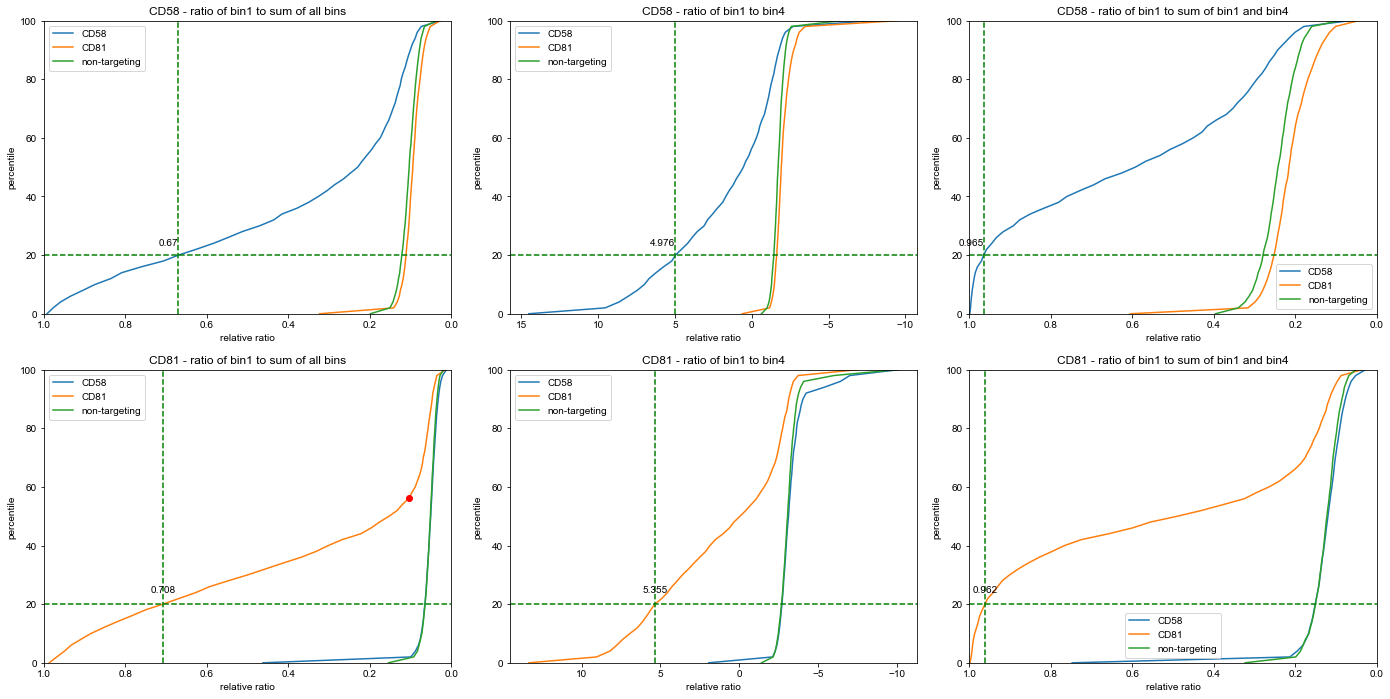

In [16]:
#ratio-percentile plot, separate by genes
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

p = np.linspace(0, 100, 51)
#plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(2, 3,figsize=(19.2,9.6),constrained_layout=True)

#cd58
axs[0, 0].plot(-np.percentile(-cd58_set['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'CD58')
axs[0, 0].plot(-np.percentile(-cd81_set['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'CD81')
axs[0, 0].plot(-np.percentile(-nt_set['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd58_1_count_relative_bin_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd58_set['cd58_1_count_relative_bin_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd58_1_count_relative_bin_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd58_set['cd58_1_count_relative_bin_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd58_set['cd58_1_count_relative_bin_avg_withr3'].values, 20)
axs[0, 0].axhline(y=20,color='g', linestyle='--')
axs[0, 0].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[0, 0].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='right')
#axs[0, 0].plot(nt_1_ratio,t1_p, 'ro')
#axs[0, 0].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[0, 0].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[0, 0].plot(nt_5_ratio,t5_p, 'ro')
#axs[0, 0].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[0, 0].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
axs[0, 0].set(xlabel='relative ratio',ylabel='percentile',xlim=(0,1),ylim=(0,100),title='CD58 - ratio of bin1 to sum of all bins')
axs[0, 0].legend()
axs[0, 0].invert_xaxis()

axs[0, 1].plot(-np.percentile(-cd58_set['cd58_1_to_4_avg_withr3'].values, p),p,label = 'CD58')
axs[0, 1].plot(-np.percentile(-cd81_set['cd58_1_to_4_avg_withr3'].values, p),p,label = 'CD81')
axs[0, 1].plot(-np.percentile(-nt_set['cd58_1_to_4_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd58_1_to_4_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd58_set['cd58_1_to_4_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd58_1_to_4_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd58_set['cd58_1_to_4_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd58_set['cd58_1_to_4_avg_withr3'].values, 20)
axs[0, 1].axhline(y=20,color='g', linestyle='--')
axs[0, 1].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[0, 1].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='right')
#axs[0, 1].plot(nt_1_ratio,t1_p, 'ro')
#axs[0, 1].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[0, 1].annotate(str(int(t1_p)), # this is the text
#             (nt_1_ratio,t1_p), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,10), # distance from text to points (x,y)
#                 ha='right') # horizontal alignment can be left, right or center
#axs[0, 1].plot(nt_5_ratio,t5_p, 'ro')
#axs[0, 1].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[0, 1].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
axs[0, 1].set(xlabel='relative ratio',ylabel='percentile',ylim=(0,100),title='CD58 - ratio of bin1 to bin4')
axs[0, 1].legend()
axs[0, 1].invert_xaxis()

axs[0, 2].plot(-np.percentile(-cd58_set['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'CD58')
axs[0, 2].plot(-np.percentile(-cd81_set['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'CD81')
axs[0, 2].plot(-np.percentile(-nt_set['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd58_1_to_sum_1_4_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd58_set['cd58_1_to_sum_1_4_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd58_1_to_sum_1_4_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd58_set['cd58_1_to_sum_1_4_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd58_set['cd58_1_to_sum_1_4_avg_withr3'].values, 20)
axs[0, 2].axhline(y=20,color='g', linestyle='--')
axs[0, 2].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[0, 2].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='right')
#axs[0, 2].plot(nt_1_ratio,t1_p, 'ro')
#axs[0, 2].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[0, 2].annotate(str(int(t1_p)), # this is the text
#             (nt_1_ratio,t1_p), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,10), # distance from text to points (x,y)
#                 ha='right') # horizontal alignment can be left, right or center
#axs[0, 2].plot(nt_5_ratio,t5_p, 'ro')
#axs[0, 2].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[0, 2].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='center',va="bottom") 
axs[0, 2].set(xlabel='relative ratio',ylabel='percentile',xlim=(0,1),ylim=(0,100),title='CD58 - ratio of bin1 to sum of bin1 and bin4')
axs[0, 2].legend()
axs[0, 2].invert_xaxis()

#axs[0, 3].plot(-np.percentile(-cd58_set['cd58_1_count_ratio_input_avg_withr3'].values, p),p,label = 'CD58')
#axs[0, 3].plot(-np.percentile(-cd81_set['cd58_1_count_ratio_input_avg_withr3'].values, p),p,label = 'CD81')
#axs[0, 3].plot(-np.percentile(-nt_set['cd58_1_count_ratio_input_avg_withr3'].values, p),p,label = 'non-targeting')
#nt_1_ratio = -np.percentile(-nt_set['cd58_1_count_ratio_input_avg_withr3'].values, 1)
#t1_p= stats.percentileofscore(-cd58_set['cd58_1_count_ratio_input_avg_withr3'],-nt_1_ratio)
#nt_5_ratio = -np.percentile(-nt_set['cd58_1_count_ratio_input_avg_withr3'].values, 5)
#t5_p= stats.percentileofscore(-cd58_set['cd58_1_count_ratio_input_avg_withr3'],-nt_5_ratio)
#axs[0, 3].plot(nt_1_ratio,t1_p, 'ro')
#axs[0, 3].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[0, 3].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[0, 3].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[0, 3].plot(nt_5_ratio,t5_p, 'ro')
#axs[0, 3].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[0, 3].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
#axs[0, 3].set(xlabel='relative ratio',ylabel='percentile',ylim=(0,100),title='CD58 - ratio of bin1 to unsorted')
#axs[0, 3].legend()
#axs[0, 3].invert_xaxis()

#axs[0, 4].plot(-np.percentile(-cd58_set['cd58_1_to_3_avg_withr3'].values, p),p,label = 'CD58')
#axs[0, 4].plot(-np.percentile(-cd81_set['cd58_1_to_3_avg_withr3'].values, p),p,label = 'CD81')
#axs[0, 4].plot(-np.percentile(-nt_set['cd58_1_to_3_avg_withr3'].values, p),p,label = 'non-targeting')
#nt_1_ratio = -np.percentile(-nt_set['cd58_1_to_3_avg_withr3'].values, 1)
#t1_p= stats.percentileofscore(-cd58_set['cd58_1_to_3_avg_withr3'],-nt_1_ratio)
#nt_5_ratio = -np.percentile(-nt_set['cd58_1_to_3_avg_withr3'].values, 5)
#t5_p= stats.percentileofscore(-cd58_set['cd58_1_to_3_avg_withr3'],-nt_5_ratio)
#axs[0, 4].plot(nt_1_ratio,t1_p, 'ro')
#axs[0, 4].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[0, 4].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[0, 4].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[0, 4].plot(nt_5_ratio,t5_p, 'ro')
#axs[0, 4].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[0, 4].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
#axs[0, 4].set(xlabel='relative ratio in',ylabel='percentile',ylim=(0,100),title='CD58 - ratio of bin1 to bin3')
#axs[0, 4].legend()
#axs[0, 4].invert_xaxis()

#cd81
axs[1, 0].plot(-np.percentile(-cd58_set['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'CD58')
axs[1, 0].plot(-np.percentile(-cd81_set['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'CD81')
axs[1, 0].plot(-np.percentile(-nt_set['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd81_1_count_relative_bin_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd81_set['cd81_1_count_relative_bin_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd81_1_count_relative_bin_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd81_set['cd81_1_count_relative_bin_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd81_set['cd81_1_count_relative_bin_avg_withr3'].values, 20)
axs[1, 0].axhline(y=20,color='g', linestyle='--')
axs[1, 0].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[1, 0].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='center',va="bottom")
axs[1, 0].plot(nt_1_ratio,t1_p, 'ro')
#axs[1, 0].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[1, 0].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
axs[1, 0].set(xlabel='relative ratio',ylabel='percentile',xlim=(0,1),ylim=(0,100),title='CD81 - ratio of bin1 to sum of all bins')
#axs[1, 0].plot(nt_5_ratio,t5_p, 'ro')
#axs[1, 0].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[1, 0].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
axs[1, 0].legend()
axs[1, 0].invert_xaxis()

axs[1, 1].plot(-np.percentile(-cd58_set['cd81_1_to_4_avg_withr3'].values, p),p,label = 'CD58')
axs[1, 1].plot(-np.percentile(-cd81_set['cd81_1_to_4_avg_withr3'].values, p),p,label = 'CD81')
axs[1, 1].plot(-np.percentile(-nt_set['cd81_1_to_4_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd81_1_to_4_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd81_set['cd81_1_to_4_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd81_1_to_4_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd81_set['cd81_1_to_4_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd81_set['cd81_1_to_4_avg_withr3'].values, 20)
axs[1, 1].axhline(y=20,color='g', linestyle='--')
axs[1, 1].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[1, 1].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='center',va="bottom")
#axs[1, 1].plot(nt_1_ratio,t1_p, 'ro')
#axs[1, 1].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[1, 1].annotate(str(int(t1_p)), # this is the text
#             (nt_1_ratio,t1_p), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,10), # distance from text to points (x,y)
#                 ha='right') # horizontal alignment can be left, right or center
#axs[1, 1].plot(nt_5_ratio,t5_p, 'ro')
#axs[1, 1].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[1, 1].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
axs[1, 1].set(xlabel='relative ratio',ylabel='percentile',ylim=(0,100),title='CD81 - ratio of bin1 to bin4')
axs[1, 1].legend()
axs[1, 1].invert_xaxis()

axs[1, 2].plot(-np.percentile(-cd58_set['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'CD58')
axs[1, 2].plot(-np.percentile(-cd81_set['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'CD81')
axs[1, 2].plot(-np.percentile(-nt_set['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'non-targeting')
nt_1_ratio = -np.percentile(-nt_set['cd81_1_to_sum_1_4_avg_withr3'].values, 1)
t1_p= stats.percentileofscore(-cd81_set['cd81_1_to_sum_1_4_avg_withr3'],-nt_1_ratio)
nt_5_ratio = -np.percentile(-nt_set['cd81_1_to_sum_1_4_avg_withr3'].values, 5)
t5_p= stats.percentileofscore(-cd81_set['cd81_1_to_sum_1_4_avg_withr3'],-nt_5_ratio)
ratio_20pct = -np.percentile(-cd81_set['cd81_1_to_sum_1_4_avg_withr3'].values, 20)
axs[1, 2].axhline(y=20,color='g', linestyle='--')
axs[1, 2].axvline(x=ratio_20pct,color='g', linestyle='--')
axs[1, 2].annotate(str(round(ratio_20pct, 3)),(ratio_20pct,20),textcoords="offset points", xytext=(0,10),ha='center',va="bottom")
#axs[1, 2].plot(nt_1_ratio,t1_p, 'ro')
#axs[1, 2].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[1, 2].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[1, 2].plot(nt_5_ratio,t5_p, 'ro')
#axs[1, 2].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[1, 2].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
axs[1, 2].set(xlabel='relative ratio',ylabel='percentile',xlim=(0,1),ylim=(0,100),title='CD81 - ratio of bin1 to sum of bin1 and bin4')
axs[1, 2].legend()
axs[1, 2].invert_xaxis()

#axs[1, 3].plot(-np.percentile(-cd58_set['cd81_1_count_ratio_input_avg_withr3'].values, p),p,label = 'CD58')
#axs[1, 3].plot(-np.percentile(-cd81_set['cd81_1_count_ratio_input_avg_withr3'].values, p),p,label = 'CD81')
#axs[1, 3].plot(-np.percentile(-nt_set['cd81_1_count_ratio_input_avg_withr3'].values, p),p,label = 'non-targeting')
#nt_1_ratio = -np.percentile(-nt_set['cd81_1_count_ratio_input_avg_withr3'].values, 1)
#t1_p= stats.percentileofscore(-cd81_set['cd81_1_count_ratio_input_avg_withr3'],-nt_1_ratio)
#nt_5_ratio = -np.percentile(-nt_set['cd81_1_count_ratio_input_avg_withr3'].values, 5)
#t5_p= stats.percentileofscore(-cd81_set['cd81_1_count_ratio_input_avg_withr3'],-nt_5_ratio)
#axs[1, 3].plot(nt_1_ratio,t1_p, 'ro')
#axs[1, 3].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[1, 3].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[1, 3].plot(nt_5_ratio,t5_p, 'ro')
#axs[1, 3].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[1, 3].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
#axs[1, 3].set(xlabel='relative ratio',ylabel='percentile',ylim=(0,100),title='CD81 - ratio of bin1 to unsorted')
#axs[1, 3].legend()
#axs[1, 3].invert_xaxis()

#axs[1, 4].plot(-np.percentile(-cd58_set['cd81_1_to_3_avg_withr3'].values, p),p,label = 'CD58')
#axs[1, 4].plot(-np.percentile(-cd81_set['cd81_1_to_3_avg_withr3'].values, p),p,label = 'CD81')
#axs[1, 4].plot(-np.percentile(-nt_set['cd81_1_to_3_avg_withr3'].values, p),p,label = 'non-targeting')
#nt_1_ratio = -np.percentile(-nt_set['cd81_1_to_3_avg_withr3'].values, 1)
#t1_p= stats.percentileofscore(-cd81_set['cd81_1_to_3_avg_withr3'],-nt_1_ratio)
#nt_5_ratio = -np.percentile(-nt_set['cd81_1_to_3_avg_withr3'].values, 5)
#t5_p= stats.percentileofscore(-cd81_set['cd81_1_to_3_avg_withr3'],-nt_5_ratio)
#axs[1, 4].plot(nt_1_ratio,t1_p, 'ro')
#axs[1, 4].axvline(x=nt_1_ratio, color='r', linestyle='--')
#axs[1, 4].annotate(str(int(t1_p)),(nt_1_ratio,t1_p), textcoords="offset points",xytext=(0,10),ha='right') 
#axs[1, 4].plot(nt_5_ratio,t5_p, 'ro')
#axs[1, 4].axvline(x=nt_5_ratio, color='r', linestyle='--')
#axs[1, 4].annotate(str(int(t5_p)),(nt_5_ratio,t5_p), textcoords="offset points", xytext=(0,10),ha='right') 
#axs[1, 4].set(xlabel='relative ratio in cd81_bin1',ylabel='percentile',ylim=(0,100),title='CD81 - ratio of bin1 to bin3')
#axs[1, 4].legend()
#axs[1, 4].invert_xaxis()

fig.savefig('../a_figures/validation_screen_ratios.svg',format="svg")

In [16]:
# calculate relative ranking
#ranking based on average ratio
cd58_set['bin1_relative_bin_rank_withr3'] = cd58_set['cd58_1_count_relative_bin_avg_withr3'].rank(pct=True,ascending=False)
cd81_set['bin1_relative_bin_rank_withr3'] = cd81_set['cd81_1_count_relative_bin_avg_withr3'].rank(pct=True,ascending=False)
cd58_set['bin1_to_bin4_rank_withr3'] = cd58_set['cd58_1_to_4_avg_withr3'].rank(pct=True,ascending=False)
cd81_set['bin1_to_bin4_rank_withr3'] = cd81_set['cd81_1_to_4_avg_withr3'].rank(pct=True,ascending=False)
cd58_set['bin1_to_input_rank_withr3'] = cd58_set['cd58_1_count_ratio_input_avg_withr3'].rank(pct=True,ascending=False)
cd81_set['bin1_to_input_rank_withr3'] = cd81_set['cd81_1_count_ratio_input_avg_withr3'].rank(pct=True,ascending=False)
cd58_set['bin1_to_sum_bin14_rank_withr3'] = cd58_set['cd58_1_to_sum_1_4_avg_withr3'].rank(pct=True,ascending=False)
cd81_set['bin1_to_sum_bin14_rank_withr3'] = cd81_set['cd81_1_to_sum_1_4_avg_withr3'].rank(pct=True,ascending=False)

df_rank = pd.concat([cd58_set, cd81_set])

<ipython-input-16-7c6ce09d7be5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd58_set['bin1_relative_bin_rank_withr3'] = cd58_set['cd58_1_count_relative_bin_avg_withr3'].rank(pct=True,ascending=False)
<ipython-input-16-7c6ce09d7be5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd81_set['bin1_relative_bin_rank_withr3'] = cd81_set['cd81_1_count_relative_bin_avg_withr3'].rank(pct=True,ascending=False)
<ipython-input-16-7c6ce09d7be5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [8]:
#df_rank.to_csv('validation_genes/cdscreen_r1r2_r3r4_ratios_targeting_guides.csv', index=False)

In [18]:
#different transcript
cd58_t1 = cd58_set[cd58_set['transcript id']=='NM_001779.3']
print('cd58_t1:'+str(len(cd58_t1['spacer'].values)))
cd81_t1 = cd81_set[cd81_set['transcript id']=='NM_004356.4']
print('cd81_t1:'+str(len(cd81_t1['spacer'].values)))
t2_f = pd.read_csv('../validation_genes/cd_58_81_t2_guides.csv')
t2_guides = list(t2_f['spacer'].values)
#print(len(t2_guides))
cd58_t2 = cd58_set[cd58_set['spacer'].isin(t2_guides)]
print('cd58_t2:'+str(len(cd58_t2['spacer'].values)))
cd81_t2 = cd81_set[cd81_set['spacer'].isin(t2_guides)]
print('cd81_t2:'+str(len(cd81_t2['spacer'].values)))
#shared guides for two isoforms
cd58_shared = cd58_t1[cd58_t1['spacer'].isin(t2_guides)]
print('cd58_shared:'+str(len(cd58_shared['spacer'].values)))
cd81_shared = cd81_t1[cd81_t1['spacer'].isin(t2_guides)]
print('cd81_shared:'+str(len(cd81_shared['spacer'].values)))

cd58_t1:1025
cd81_t1:1442
cd58_t2:1281
cd81_t2:1314
cd58_shared:757
cd81_shared:1137


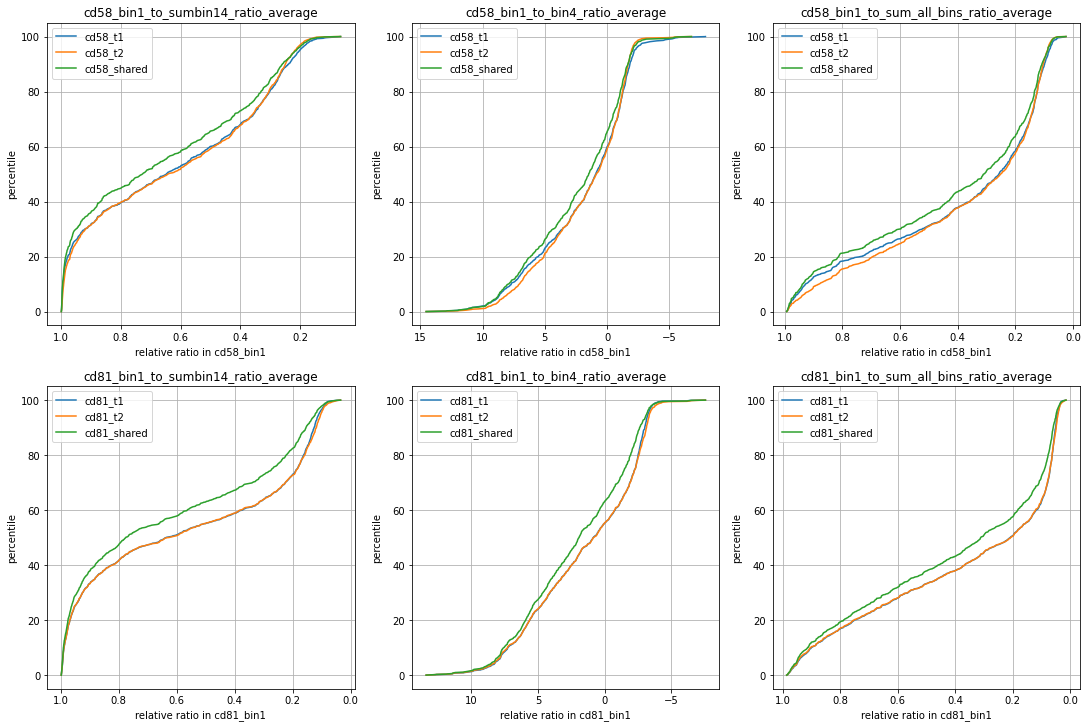

In [21]:
#transcript ratio-percentile
p = np.linspace(0, 100, 3001)
#plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(2, 3,figsize=(15,10),constrained_layout=True)

#cd58
axs[0, 0].plot(-np.percentile(-cd58_t1['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd58_t1')
axs[0, 0].plot(-np.percentile(-cd58_t2['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd58_t2')
axs[0, 0].plot(-np.percentile(-cd58_shared['cd58_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd58_shared')
axs[0, 0].set(xlabel='relative ratio in cd58_bin1',ylabel='percentile',title='cd58_bin1_to_sumbin14_ratio_average')
axs[0, 0].legend()
axs[0, 0].invert_xaxis()

axs[0, 1].plot(-np.percentile(-cd58_t1['cd58_1_to_4_avg_withr3'].values, p),p,label = 'cd58_t1')
axs[0, 1].plot(-np.percentile(-cd58_t2['cd58_1_to_4_avg_withr3'].values, p),p,label = 'cd58_t2')
axs[0, 1].plot(-np.percentile(-cd58_shared['cd58_1_to_4_avg_withr3'].values, p),p,label = 'cd58_shared')
axs[0, 1].set(xlabel='relative ratio in cd58_bin1',ylabel='percentile',title='cd58_bin1_to_bin4_ratio_average')
axs[0, 1].legend()
axs[0, 1].invert_xaxis()

axs[0, 2].plot(-np.percentile(-cd58_t1['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd58_t1')
axs[0, 2].plot(-np.percentile(-cd58_t2['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd58_t2')
axs[0, 2].plot(-np.percentile(-cd58_shared['cd58_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd58_shared')
axs[0, 2].set(xlabel='relative ratio in cd58_bin1',ylabel='percentile',title='cd58_bin1_to_sum_all_bins_ratio_average')
axs[0, 2].legend()
axs[0, 2].invert_xaxis()

#cd81
axs[1, 0].plot(-np.percentile(-cd81_t1['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd81_t1')
axs[1, 0].plot(-np.percentile(-cd81_t2['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd81_t2')
axs[1, 0].plot(-np.percentile(-cd81_shared['cd81_1_to_sum_1_4_avg_withr3'].values, p),p,label = 'cd81_shared')
axs[1, 0].set(xlabel='relative ratio in cd81_bin1',ylabel='percentile',title='cd81_bin1_to_sumbin14_ratio_average')
axs[1, 0].legend()
axs[1, 0].invert_xaxis()

axs[1, 1].plot(-np.percentile(-cd81_t1['cd81_1_to_4_avg_withr3'].values, p),p,label = 'cd81_t1')
axs[1, 1].plot(-np.percentile(-cd81_t2['cd81_1_to_4_avg_withr3'].values, p),p,label = 'cd81_t2')
axs[1, 1].plot(-np.percentile(-cd81_shared['cd81_1_to_4_avg_withr3'].values, p),p,label = 'cd81_shared')
axs[1, 1].set(xlabel='relative ratio in cd81_bin1',ylabel='percentile',title='cd81_bin1_to_bin4_ratio_average')
axs[1, 1].legend()
axs[1, 1].invert_xaxis()

axs[1, 2].plot(-np.percentile(-cd81_t1['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd81_t1')
axs[1, 2].plot(-np.percentile(-cd81_t2['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd81_t2')
axs[1, 2].plot(-np.percentile(-cd81_shared['cd81_1_count_relative_bin_avg_withr3'].values, p),p,label = 'cd81_shared')
axs[1, 2].set(xlabel='relative ratio in cd81_bin1',ylabel='percentile',title='cd81_bin1_to_sum_all_bins_ratio_average')
axs[1, 2].legend()
axs[1, 2].invert_xaxis()
#fig.savefig('../data/validation screen qc/cdscreen_r1r2new_r3r4_isoform_ratio.png', dpi=600)